In [2]:
import math
import random

def odl_dwoch(p, q):
    return (p[0] - q[0])**2 + (p[1] - q[1]) ** 2

In [3]:
def komorka_punktu(punkt, delta):
    return (math.floor(punkt[0]/delta), math.floor(punkt[1]/delta))

def krata(punkty, delta):
    krata = {}
    for p in punkty:
        komorka = komorka_punktu(p, delta)
        if komorka in krata:
            krata[komorka].append(p)
        else:
            krata[komorka] = [p]
    return krata

In [105]:
def randomizedClosestPair(punkty):
    # lista punkty będzie losową permutacją punktów wejściowych
    random.shuffle(punkty)
    #punkty.reverse()
    # delta przyjmuje wartość odległości pomiędzy dwoma losowymi punktami z listy
    delta = odl_dwoch(punkty[0], punkty[1])
    P, Q = punkty[0], punkty[1]
    G = krata([punkty[0], punkty[1]], delta)
    
    for i in range(2, len(punkty)):
        komorka = komorka_punktu(punkty[i], delta)
        # sprawdzamy punkty z sąsiedzstwa komórki zawierającej p_i
        d = delta
        # sprawdzamy osiem komórek wokół tej zawierającej rozważany punkt oraz nią samą
        for x in range(-1,2):
            for y in range(-1,2):
                if (komorka[0]+x, komorka[1]+y) in G:
                    for p in G[(komorka[0]+x, komorka[1]+y)]:
                        d_ = odl_dwoch(punkty[i], p)
                        if d_ < d:
                            d = d_
                            P, Q = punkty[i], p
        # jeśli udało nam się uzyskać odległość mniejszą od delty, aktualizujemy parę (P, Q)
        # jesli (delta_i = delta_i-1) dodajemy p_i do kraty
        if d == delta:
            if komorka in G:
                G[komorka].append(punkty[i])
            else:
                G[komorka] = [punkty[i]]
        # w przeciwnym razie kasujemy G_d_i-1 i tworzymy nową kratę G_d_i
        else:
            delta = d
            G = krata(punkty[0:i+1], delta)
    return delta, (P, Q)

In [83]:
from matplotlib import pyplot as plt

def rysunek(punkty, para):
    x, y = [x[0] for x in punkty], [x[1] for x in punkty]
    fig = plt.figure()
    plt.gca().set_aspect('equal',adjustable='datalim')
    plt.scatter(x,y, color = 'gray', s=1)
    p1, p2 = [x[0] for x in para], [x[1] for x in para]
    plt.scatter(p1,p2,color='red', s=2)

In [84]:
def rand_punkty(n: int, r: int):
    return list(set((random.randint(0, r), random.randint(0, r)) for i in range(n)))

In [85]:
import time
def wykonaj(punkty):
    start = time.time()
    odl, para = randomizedClosestPair(punkty)
    print("liczba punktów:", len(punkty), "\nnajkrotszy dystans:", math.sqrt(odl), "\nczas:", (time.time() - start))
    rysunek(punkty, para)

liczba punktów: 100 
najkrotszy dystans: 8.48528137423857 
czas: 0.002994060516357422


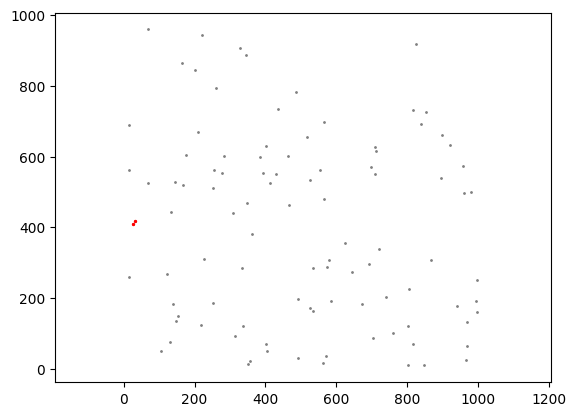

In [86]:
wykonaj(rand_punkty(100,1000))

liczba punktów: 1000 
najkrotszy dystans: 6.4031242374328485 
czas: 0.03889131546020508


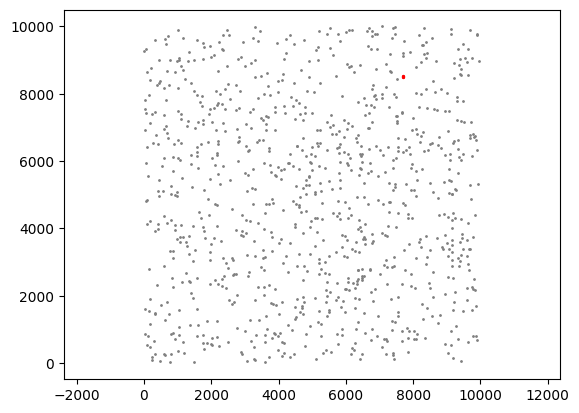

In [34]:
wykonaj(rand_punkty(1000,10000))

liczba punktów: 10000 
najkrotszy dystans: 5.830951894845301 
czas: 0.34105992317199707


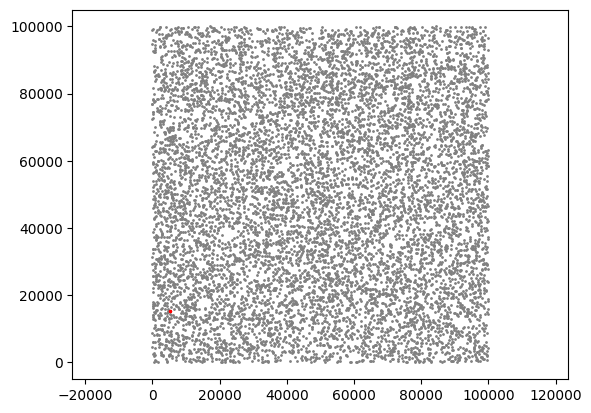

In [55]:
wykonaj(rand_punkty(10000,100000))

liczba punktów: 100000 
najkrotszy dystans: 15.264337522473747 
czas: 4.047155857086182


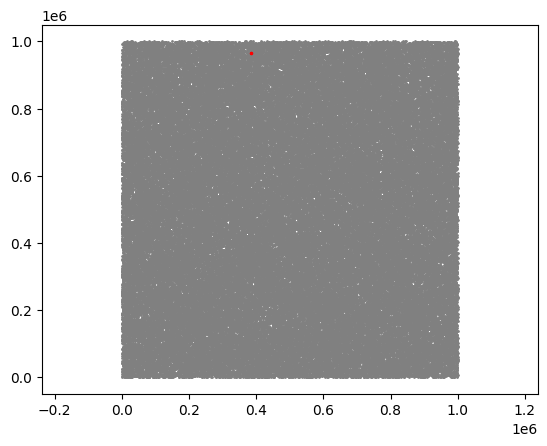

In [23]:
wykonaj(rand_punkty(100000,1000000))

liczba punktów: 1000000 
najkrotszy dystans: 12.041594578792296 
czas: 41.30570983886719


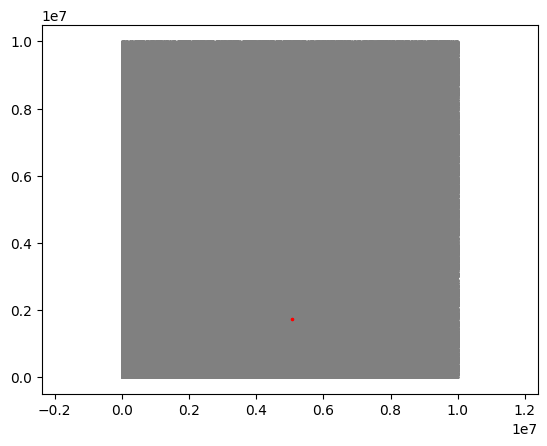

In [56]:
wykonaj(rand_punkty(1000000,10000000))

In [98]:
def niewygodne(n: int):
    lista = list(((x*(x+1)), (x*(x+1))) for x in range(n))
    lista.reverse()
    return lista

In [99]:
lista = niewygodne(100)
lista.reverse()
lista

[(9900, 9900),
 (9702, 9702),
 (9506, 9506),
 (9312, 9312),
 (9120, 9120),
 (8930, 8930),
 (8742, 8742),
 (8556, 8556),
 (8372, 8372),
 (8190, 8190),
 (8010, 8010),
 (7832, 7832),
 (7656, 7656),
 (7482, 7482),
 (7310, 7310),
 (7140, 7140),
 (6972, 6972),
 (6806, 6806),
 (6642, 6642),
 (6480, 6480),
 (6320, 6320),
 (6162, 6162),
 (6006, 6006),
 (5852, 5852),
 (5700, 5700),
 (5550, 5550),
 (5402, 5402),
 (5256, 5256),
 (5112, 5112),
 (4970, 4970),
 (4830, 4830),
 (4692, 4692),
 (4556, 4556),
 (4422, 4422),
 (4290, 4290),
 (4160, 4160),
 (4032, 4032),
 (3906, 3906),
 (3782, 3782),
 (3660, 3660),
 (3540, 3540),
 (3422, 3422),
 (3306, 3306),
 (3192, 3192),
 (3080, 3080),
 (2970, 2970),
 (2862, 2862),
 (2756, 2756),
 (2652, 2652),
 (2550, 2550),
 (2450, 2450),
 (2352, 2352),
 (2256, 2256),
 (2162, 2162),
 (2070, 2070),
 (1980, 1980),
 (1892, 1892),
 (1806, 1806),
 (1722, 1722),
 (1640, 1640),
 (1560, 1560),
 (1482, 1482),
 (1406, 1406),
 (1332, 1332),
 (1260, 1260),
 (1190, 1190),
 (1122, 11

liczba punktów: 10000 
najkrotszy dystans: 2.8284271247461903 
czas: 0.2173621654510498


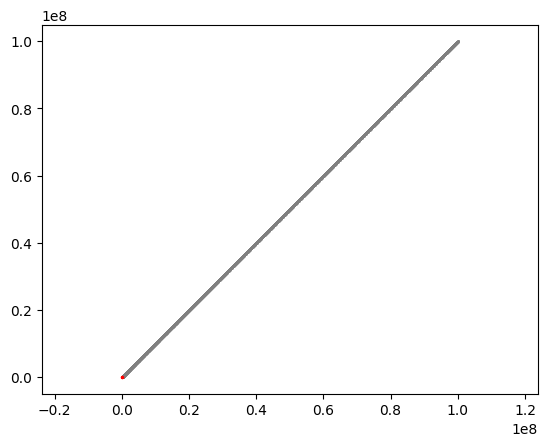

In [106]:
wykonaj(niewygodne(10000))